## Analysis of recommenders

In [2]:
from Utils.Dataset import Dataset

dataset = Dataset(path='./Data', validation_percentage=0, test_percentage=0.2)
stacked_URM, _ = dataset.stack_URM_ICM(dataset.URM_train, dataset.ICM)

In [3]:
import numpy as np 
import scipy.sparse as sps

profile_length = np.ediff1d(sps.csr_matrix(dataset.URM_train).indptr)
profile_length, profile_length.shape

(array([140, 496, 113, ..., 200, 151, 253], dtype=int32), (13650,))

In [4]:
num_split = 10

In [5]:
block_size = int(len(profile_length)*(1/num_split))
block_size

1365

In [6]:
sorted_users = np.argsort(profile_length)
sorted_users

array([11326,  3075,   758, ...,  1141,  8526,   317], dtype=int64)

In [7]:
for group_id in range(0, num_split):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 1365, average p.len 52.98, median 54.0, min 5, max 90
Group 1, #users in group 1365, average p.len 118.24, median 119.0, min 90, max 143
Group 2, #users in group 1365, average p.len 164.84, median 165.0, min 143, max 185
Group 3, #users in group 1365, average p.len 206.57, median 206.0, min 185, max 229
Group 4, #users in group 1365, average p.len 250.95, median 251.0, min 229, max 272
Group 5, #users in group 1365, average p.len 294.91, median 295.0, min 272, max 319
Group 6, #users in group 1365, average p.len 344.57, median 344.0, min 319, max 372
Group 7, #users in group 1365, average p.len 410.28, median 410.0, min 372, max 451
Group 8, #users in group 1365, average p.len 507.83, median 503.0, min 451, max 577
Group 9, #users in group 1365, average p.len 746.65, median 693.0, min 577, max 1747


In [8]:
# Base
from Recommenders.Base.TopPop import TopPop

# CF
from Recommenders.CF.KNN.ItemKNNCF import ItemKNNCF
from Recommenders.CF.KNN.UserKNNCF import UserKNNCF
from Recommenders.CF.KNN.RP3beta import RP3beta
from Recommenders.CF.KNN.P3alpha import P3alpha
from Recommenders.CF.KNN.EASE_R import EASE_R
from Recommenders.CF.MatrixFactorization.PureSVD import PureSVD, ScaledPureSVD
from Recommenders.CF.MatrixFactorization.PureSVDItem import PureSVDItem
from Recommenders.CF.KNN.SLIMElasticNet import SLIMElasticNet, MultiThreadSLIM_SLIMElasticNet
from Recommenders.CF.KNN.SLIM_BPR import SLIM_BPR
from Recommenders.CF.MatrixFactorization.IALS import IALS
from Recommenders.CF.MatrixFactorization.NMF import NMF
from Recommenders.CF.LightFM import LightFM
from Recommenders.CF.MultVAE import MultVAE
from Recommenders.CF.MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython,\
    MatrixFactorization_FunkSVD_Cython, MatrixFactorization_AsySVD_Cython

# CB
from Recommenders.CB.KNN.ItemKNNCBF import ItemKNNCBF

# Hybrid 
from Recommenders.Hybrid.ItemKNN_CFCBF_Hybrid import ItemKNN_CFCBF_Hybrid
from Recommenders.Hybrid.Hybrid1 import Hybrid1
from Recommenders.Hybrid.Hybrid2 import Hybrid2
from Recommenders.Hybrid.Hybrid3 import Hybrid3


C:\Users\Martim\AppData\Local\Programs\Python\Python39\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [11]:
from Utils.import_recommenders import *

MAP_recommender_per_group = {}

collaborative_recommender_class = {
    'TopPop': TopPop,
    
    'ItemKNNCF': ItemKNNCF,
    'UserKNNCF': UserKNNCF,
    
    'RP3beta': RP3beta,
    'P3alpha': P3alpha,
    
    'EASE_R': EASE_R,
    
    'PureSVD': PureSVD,
    'ScaledPureSVD': ScaledPureSVD,
    'PureSVDItem': PureSVDItem,
    
    #'SLIM_BPR': SLIM_BPR,
    'MultiThreadSLIM_SLIMElasticNet': MultiThreadSLIM_SLIMElasticNet,

    'IALS': IALS,
    #'NMF': NMF,
    #'LightFM': LightFM,
    #'MultVAE': MultVAE,

    # 'MatrixFactorization_FunkSVD_Cython': MatrixFactorization_FunkSVD_Cython,
    # 'MatrixFactorization_AsySVD_Cython': MatrixFactorization_AsySVD_Cython,
    'MatrixFactorization_BPR_Cython': MatrixFactorization_BPR_Cython
    }

hybrid_recommender_class = {
    'ItemKNN_CFCBF_Hybrid': ItemKNN_CFCBF_Hybrid,
    'Hybrid1': Hybrid1,
    'Hybrid2': Hybrid2,
    'Hybrid3': Hybrid3,
}

recommender_object_dict = {}

for label, recommender_class in collaborative_recommender_class.items():
    recommender_object = recommender_class(stacked_URM)
    recommender_object.fit()
    recommender_object_dict[label] = recommender_object

for label, recommender_class in hybrid_recommender_class.items():
    recommender_object = recommender_class(stacked_URM, dataset.ICM)
    recommender_object.fit()
    recommender_object_dict[label] = recommender_object

Similarity column 18059 (100.0%), 1334.70 column/sec. Elapsed time 13.53 sec
Similarity column 13876 (100.0%), 598.64 column/sec. Elapsed time 23.18 sec
EASE_R: Fitting model... 
Similarity column 18059 (100.0%), 900.43 column/sec. Elapsed time 20.06 sec
EASE_R: Fitting model... done in 2.89 min
PureSVD: Computing SVD decomposition...
PureSVD: Computing SVD decomposition... done in 1.11 sec
ScaledPureSVD: Computing SVD decomposition...
ScaledPureSVD: Computing SVD decomposition... done in 4.00 sec
PureSVDItem: Computing SVD decomposition...
PureSVDItem: Computing SVD decomposition... Done!


100%|█████████▉| 18056/18059 [17:08<00:00, 17.55it/s]


IALS: Epoch 1 of 30. Elapsed time 24.03 sec
IALS: Epoch 2 of 30. Elapsed time 47.78 sec
IALS: Epoch 3 of 30. Elapsed time 1.19 min
IALS: Epoch 4 of 30. Elapsed time 1.59 min
IALS: Epoch 5 of 30. Elapsed time 1.99 min
IALS: Epoch 6 of 30. Elapsed time 2.43 min
IALS: Epoch 7 of 30. Elapsed time 2.87 min
IALS: Epoch 8 of 30. Elapsed time 3.27 min
IALS: Epoch 9 of 30. Elapsed time 3.67 min
IALS: Epoch 10 of 30. Elapsed time 4.08 min
IALS: Epoch 11 of 30. Elapsed time 4.49 min
IALS: Epoch 12 of 30. Elapsed time 4.89 min
IALS: Epoch 13 of 30. Elapsed time 5.29 min
IALS: Epoch 14 of 30. Elapsed time 5.69 min
IALS: Epoch 15 of 30. Elapsed time 6.09 min
IALS: Epoch 16 of 30. Elapsed time 6.49 min
IALS: Epoch 17 of 30. Elapsed time 6.88 min
IALS: Epoch 18 of 30. Elapsed time 7.28 min
IALS: Epoch 19 of 30. Elapsed time 7.68 min
IALS: Epoch 20 of 30. Elapsed time 8.08 min
IALS: Epoch 21 of 30. Elapsed time 8.48 min
IALS: Epoch 22 of 30. Elapsed time 8.88 min
IALS: Epoch 23 of 30. Elapsed time 9.28

<ipython-input-11-02a69b28f3fe>:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  recommender_object.fit()


MF_BPR: Epoch 1 of 300. Elapsed time 0.02 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.86 seconds. BPR loss 2.19E-03. Sample per second: 15165
MF_BPR: Epoch 2 of 300. Elapsed time 0.04 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.88 seconds. BPR loss 2.15E-03. Sample per second: 14735
MF_BPR: Epoch 3 of 300. Elapsed time 0.07 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.91 seconds. BPR loss 2.17E-03. Sample per second: 14298
MF_BPR: Epoch 4 of 300. Elapsed time 0.09 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.93 seconds. BPR loss 2.18E-03. Sample per second: 13975
MF_BPR: Epoch 5 of 300. Elapsed time 0.11 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.95 seconds. BPR loss 2.14E-03. Sample per second: 13652
MF_BPR: Epoch 6 of 300. Elapsed time 0.13 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.97 seconds. BPR loss 2.16E-03. Sample per second: 13371
MF_BPR: Epoch 7 of 300. Elapsed time 0.15 sec
MF_BPR: Processed 13000 ( 92.86% ) in 0.99 seconds. BPR loss 2.14E-03. Sample per second: 13089
MF_BPR

In [12]:
from Utils.Evaluator import EvaluatorHoldout

for group_id in range(0, 10):
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    users_in_group = sorted_users[start_pos:end_pos]
    users_in_group_p_len = profile_length[users_in_group]
    
    print('Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}'.format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(dataset.URM_test, cutoff_list=[10], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[10]['MAP'])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[10]['MAP']]
        

Group 0, #users in group 1365, average p.len 52.98, median 54.0, min 5, max 90
EvaluatorHoldout: Ignoring 13644 ( 0.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 12285 Users
EvaluatorHoldout: Processed 1359 (100.0%) in 0.57 sec. Users per second: 2390
EvaluatorHoldout: Processed 1359 (100.0%) in 0.49 sec. Users per second: 2776
EvaluatorHoldout: Processed 1359 (100.0%) in 0.81 sec. Users per second: 1683
EvaluatorHoldout: Processed 1359 (100.0%) in 0.45 sec. Users per second: 3013
EvaluatorHoldout: Processed 1359 (100.0%) in 0.31 sec. Users per second: 4400
EvaluatorHoldout: Processed 1359 (100.0%) in 6.94 sec. Users per second: 196
EvaluatorHoldout: Processed 1359 (100.0%) in 2.48 sec. Users per second: 547
EvaluatorHoldout: Processed 1359 (100.0%) in 0.70 sec. Users per second: 1944
EvaluatorHoldout: Processed 1359 (100.0%) in 2.35 sec. Users per second: 579
EvaluatorHoldout: Processed 1359 (100.0%) in 0.87 sec. Users per second: 1560
EvaluatorHoldout: 

<ipython-input-12-48840ee70497>:12: RuntimeWarning: Mean of empty slice.
  users_in_group_p_len.mean(),
C:\Users\Martim\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Martim\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


ValueError: zero-size array to reduction operation minimum which has no identity

In [13]:
for label, recommender in recommender_object_dict.items():
  result_df, _ = evaluator_test.evaluateRecommender(recommender)
  if label in MAP_recommender_per_group:
      MAP_recommender_per_group[label].append(result_df.loc[10]['MAP'])
  else:
      MAP_recommender_per_group[label] = [result_df.loc[10]['MAP']]

EvaluatorHoldout: Processed 1365 (100.0%) in 0.53 sec. Users per second: 2585
EvaluatorHoldout: Processed 1365 (100.0%) in 0.77 sec. Users per second: 1772
EvaluatorHoldout: Processed 1365 (100.0%) in 3.02 sec. Users per second: 451
EvaluatorHoldout: Processed 1365 (100.0%) in 0.97 sec. Users per second: 1401
EvaluatorHoldout: Processed 1365 (100.0%) in 0.40 sec. Users per second: 3393
EvaluatorHoldout: Processed 1365 (100.0%) in 6.01 sec. Users per second: 227
EvaluatorHoldout: Processed 1365 (100.0%) in 0.44 sec. Users per second: 3086
EvaluatorHoldout: Processed 1365 (100.0%) in 0.58 sec. Users per second: 2355
EvaluatorHoldout: Processed 1365 (100.0%) in 5.78 sec. Users per second: 236
EvaluatorHoldout: Processed 1365 (100.0%) in 2.30 sec. Users per second: 594
EvaluatorHoldout: Processed 1365 (100.0%) in 0.53 sec. Users per second: 2568
EvaluatorHoldout: Processed 1365 (100.0%) in 0.58 sec. Users per second: 2354
EvaluatorHoldout: Processed 1365 (100.0%) in 1.00 sec. Users per sec

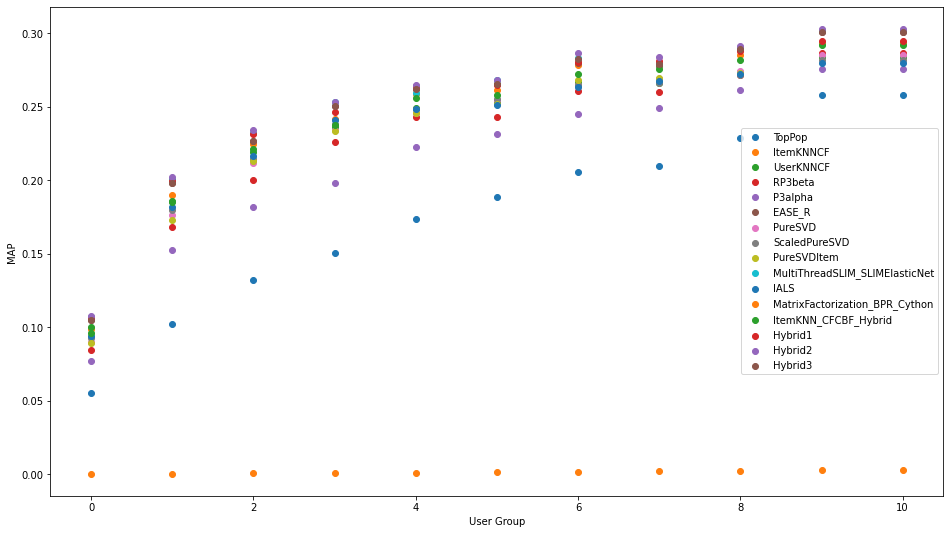

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)

plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

In [22]:
for label, recommender in recommender_object_dict.items():
    print(f'Recommender: {label}')
    results = MAP_recommender_per_group[label]
    
    for idx, res in enumerate(results): 
        print(f'\tGroup {idx}: {res}')

Recommender: TopPop
	Group 0: 0.054812449630330426
	Group 1: 0.10200424443281589
	Group 2: 0.13186909122623408
	Group 3: 0.15050680272108866
	Group 4: 0.17397520204663047
	Group 5: 0.18866474795046212
	Group 6: 0.2058881621024475
	Group 7: 0.20987449851735557
	Group 8: 0.22852910052910055
	Group 9: 0.2581591953020525
	Group 10: 0.2581591953020525
Recommender: ItemKNNCF
	Group 0: 0.09863946412511537
	Group 1: 0.18976356183499044
	Group 2: 0.22464803186231735
	Group 3: 0.24163105413105357
	Group 4: 0.25889717425431685
	Group 5: 0.261679516250944
	Group 6: 0.27878565614279877
	Group 7: 0.2795072969358687
	Group 8: 0.2852512355369496
	Group 9: 0.2931523925809638
	Group 10: 0.2931523925809638
Recommender: UserKNNCF
	Group 0: 0.10019157994323549
	Group 1: 0.18557834757834762
	Group 2: 0.21896479446479433
	Group 3: 0.23631658817373086
	Group 4: 0.24938926681783832
	Group 5: 0.2536000058142915
	Group 6: 0.26696967846967856
	Group 7: 0.2663084190941332
	Group 8: 0.2734986336414904
	Group 9: 0.2